# 4. Logistic Regression

### 공부 시간에 따른 자격증 시험 합격 가능성

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
dataset = pd.read_csv('LogisticRegressionData.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

### 데이터 분리

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 학습 (로지스틱 회기 모델)

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

### n시간 공부했을 때 예측

In [57]:
classifier.predict([[6]]) #결과 1이라는 것은 합격할 것으로 예측 -> 50%이상이면 나옴

array([1])

In [59]:
classifier.predict_proba([[6]]) #합격할 확률 출력
#불합격 확률은 14%, 합격 확률은 85% 

array([[0.141483, 0.858517]])

In [61]:
classifier.predict([[4]]) #결과 0이라는 것은 불합격할 것으로 예측

array([0])

In [63]:
classifier.predict_proba([[4]])

array([[0.62497682, 0.37502318]])

### 분류 결과 예측 (테스트 세트)

In [66]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 1])

In [68]:
y_test #실제 값 [테스트 세트]

array([1, 0, 1, 0])

In [74]:
X_test

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

In [78]:
classifier.score(X_test, y_test)
#전체 테스트 세트에서 분류 예측을 올바로 한 것의 비율로 점수를 냄.

0.75

In [80]:
classifier.score(X_train, y_train)

0.875

### 데이터 시각화 (훈련 세트)

In [88]:
X_flat = np.ravel(X_train)
X_range = np.arange(min(X_flat), max(X_flat), 0.1)
X_range

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3])

In [94]:
# p는 시그모이드 함수. 
# 그 함수에 대한 계산 식 p = 1 / (1 + e^y)
# p = 1 / (1 + np.exp(-y)) 여기서 y = mx + b
# p = 1 / (1 + np.exp(-(m * X_range + b)))
# m = classifier.coef_
# b = classifier.intercept_
p = 1 / (1 + np.exp(-(classifier.coef_ * X_range + classifier.intercept_)))
p

array([[0.01035583, 0.01161118, 0.0130167 , 0.01458984, 0.01634996,
        0.01831847, 0.02051904, 0.02297778, 0.0257234 , 0.02878743,
        0.03220437, 0.03601184, 0.04025075, 0.04496534, 0.05020326,
        0.05601555, 0.06245651, 0.06958349, 0.07745655, 0.08613794,
        0.09569142, 0.10618136, 0.1176716 , 0.13022408, 0.14389721,
        0.15874395, 0.17480973, 0.19213011, 0.21072838, 0.23061305,
        0.25177552, 0.27418791, 0.29780133, 0.32254464, 0.348324  ,
        0.37502318, 0.40250484, 0.43061281, 0.45917517, 0.4880083 ,
        0.51692146, 0.54572176, 0.57421932, 0.60223222, 0.62959096,
        0.65614237, 0.6817526 , 0.70630918, 0.72972211, 0.75192414,
        0.77287004, 0.79253536, 0.81091459, 0.82801892, 0.84387392,
        0.858517  , 0.87199503, 0.88436205, 0.89567719, 0.90600282,
        0.91540298, 0.923942  , 0.93168343, 0.9386892 , 0.94501893,
        0.95072949, 0.95587461, 0.96050477, 0.96466704, 0.96840509,
        0.97175925, 0.97476661, 0.97746114, 0.97

In [96]:
p.shape

(1, 79)

In [98]:
X_range.shape

(79,)

In [104]:
p = p.reshape(-1) # 원래 배열의 
p.shape

(79,)

Text(0, 0.5, 'P')

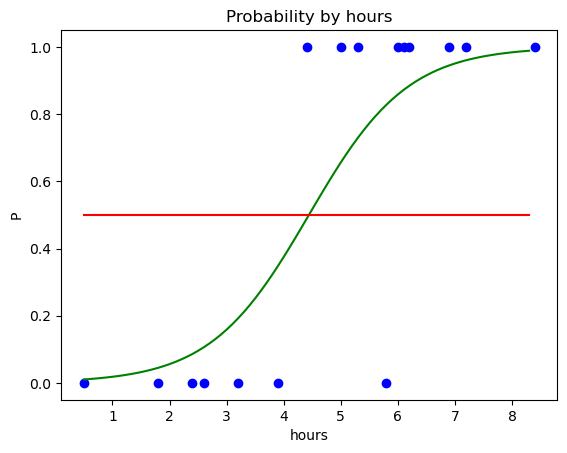

In [117]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X_range, np.full(len(X_range), 0.5), color='red')
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('P')

### 데이터 시각화 (테스트 세트)


Text(0, 0.5, 'P')

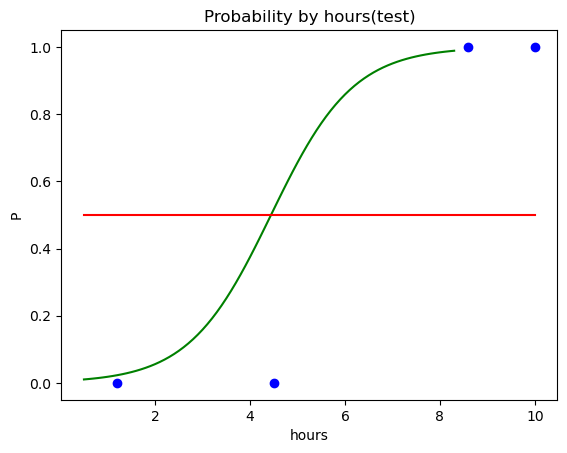

In [126]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_range, p, color='green')
plt.plot(X, np.full(len(X), 0.5), color='red')
plt.title('Probability by hours(test)')
plt.xlabel('hours')
plt.ylabel('P')

In [128]:
classifier.predict_proba([[4.5]]) #4.5시간 공부했을 때 확률 (모델에서는 51%로 합격 예측, 실제로는 불합격)

array([[0.48307854, 0.51692146]])

### 혼돈 행렬 (Confusion Matrix)

In [135]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

# True Negative(TN)  False Positive(FP)
# 불합격일거야(예측)     합격일거야(예측)
# 불합격(실제)         합격(실제)

# False Netagive(FN)   True Positive(TP)
# 불합격일거야 (예측)      합격일거야 (예측)
# 합격 (실제)            합격 (실제)

array([[1, 1],
       [0, 2]])